# TASK-1 Predection using Supervised ML

    - Predict the percentage of an student based on the no. of study hours.
    - What will be predicted score if a student studies for 9.25 hrs/day.
    - Use R, Python, SAS Enterprise Miner or any other tool.

In [1]:
# importing libraries
# To structure the dataframe (Data)
import pandas as pd

# To do Numirical calculations
import numpy as np

# To visualise the data (Matplotlib)
import matplotlib.pyplot as plt
%matplotlib inline

# To Visualise the data (Seaborn)
import seaborn as sns

# To split te data
from sklearn.model_selection import train_test_split

# For model evalution
from sklearn import metrics

# Imoprt the inbuld ML Algorithm (Linear Regression)
from sklearn.linear_model import LinearRegression

In [2]:
# Importing Data

# Import using URL
# Set the url
url = "http://bit.ly/w-data"

# Read that url using pandas
df_student = pd.read_csv(url)

# Print successful import
print("The data is imported sucessfully",)

# Show the dataframe
df_student

The data is imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Basic Characteristics of the data
# Cenral Tendency of the data
df_student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


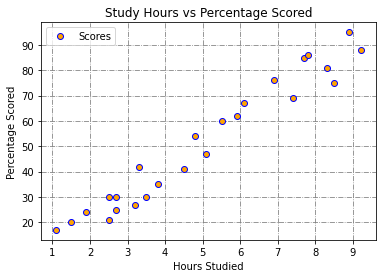

In [5]:
# Data Visualization
# Dot Plot
df_student.plot(x='Hours', y='Scores', style='o', markeredgecolor='blue', markerfacecolor='Orange' )
plt.title('Study Hours vs Percentage Scored')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid(True, color='grey', linestyle= "-.")
plt.show()

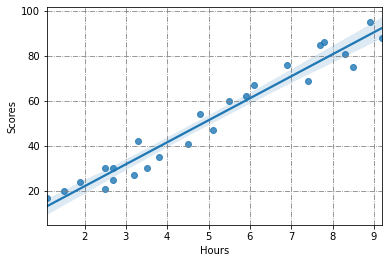

In [6]:
# See linear imressions that we see in baove graph
# that must help us in model selection
sns.regplot(x='Hours', y='Scores', data=df_student)
plt.grid(True, color='gray', linestyle='-.')

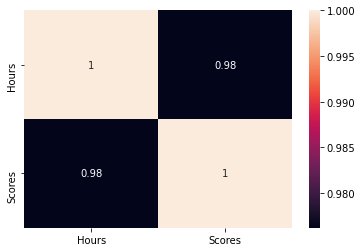

In [7]:
# see wether any correlation between depandant and indepandant veriable
correlation = df_student.corr()
# Heat map is best representive of correlation
sns.heatmap(correlation, annot=True)
plt.show()

In [9]:
# Doing Data Manipulation
# See wether any null values are there or nor
df_student.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
# saperate the depandant and Indepandant Veriable
x = df_student.iloc[:,:1]
y = df_student.iloc[:,1:]

In [12]:
# Fetch indepandant veriable 
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [13]:
# Fetch dependant(Target) Veriable
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [14]:
# Linear Regression Model

# Splitting training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=0)

In [15]:
# Fetch the test data
print('Test Set')
print(x_test.shape)
print(y_test.shape)

Test Set
(8, 1)
(8, 1)


In [16]:
# Fetch the training data
print('Training Set')
print(x_train.shape)
print(y_train.shape)

Training Set
(17, 1)
(17, 1)


In [17]:
# Training the model

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [18]:
# Fetch the coificent
regressor.coef_

array([[9.78856669]])

In [19]:
# Fetch the intercep
regressor.intercept_

array([2.37081538])

In [20]:
# Predecting the model

y_pred = regressor.predict(x_test)

In [21]:
# make new dataframe to those new predicted values
y_pred = pd.DataFrame(y_pred, columns=['Predicted Values'])
y_pred.head()

,Predicted Values
0,17.053665
1,33.694229
2,74.806209
3,26.842232
4,60.123359


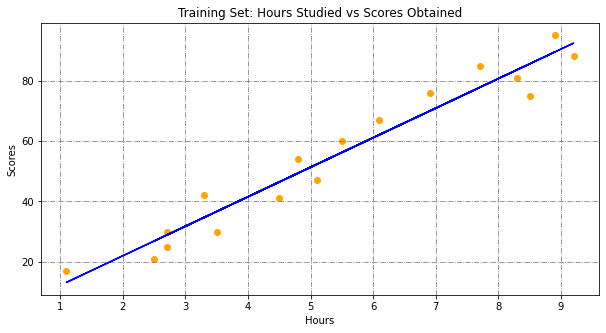

In [22]:
# Plotting regression line and plotting for test data

# Here we are plotting and visualising training set and regression line

plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color='orange')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Training Set: Hours Studied vs Scores Obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True, color='gray', linestyle='-.')
plt.show()

In [23]:
# Checking the accuracy scores for training and test set

print('Test Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Test Score
0.9568211104435257
Training Score
0.9484997422695115


In [24]:
# Making Predictions

# Here we are predicting how much does he/she will score if he/she will study for 9.25hrs in a day

hours=9.25
pred = regressor.predict([[hours]])
print('Number of hours = {}' .format(hours))
print('Predicted Score = {}' .format(pred[0]))

Number of hours = 9.25
Predicted Score = [92.91505723]


In [25]:
# Evaluating the model
# Print the MAE
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.419727808027652


In [26]:
# MSE
error = metrics.mean_squared_error(y_test,y_pred)
print('Mean Square Error: ', error)

Mean Square Error:  22.96509721270043


In [27]:
# RMSE
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Square Error:  4.792191274636315


In [29]:
# R squared
print('R^2 Score: ', metrics.r2_score(y_test, y_pred))

R^2 Score:  0.9568211104435257


# Continue Learning.......................................